## Problem: 
A person makes a doctor appointment, receives all the instructions and no-show. Why do 30% of patients miss their scheduled appointments?


## Hypothesis: 
My goal is to understand what are the main factors contribute that a patient no-show up on the appointment day. 

_Hypothesis Testing_: Is there significant difference in the means of ages between patients who didn't show-up and the entire pateint population?

_Null Hypothesis:(HO)_ The null hypothesis would be that there is no difference in age between patients who didn't showup and the entire employee population.

_Alternate Hypothesis: (HA)_ The alternative hypothesis would be that there is a difference in between patients who didn't showup and the entire patients population.



## Data Exploration 

Loading everything that you need to start working on the problem. This includes loading the libraries and the datasets.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_df = pd.read_csv('KaggleV2-May-2016.csv')

#Get a quick overview what we are dealing in our dataset
data_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

The dataset has:
- 300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. 
- 30% Pateint didn't show-up during the appointment time.

### Variable Identification

First identify the _Predicator(input)_ and _Target(output)_ variables. In this problem the _Target variable_ is **No-show** variable, Predicator are the rest features.

In [3]:
#make a copy of our original dataframe
Med_data_df = data_df.copy()

In [4]:
#dimensions of the data, reviewing the shape and size of the data
Med_data_df.shape

(110527, 14)

In [5]:
# Let check the datatypes of each attributes
Med_data_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#rename columns for better readability
Med_data_df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

In [7]:
#formatting ScheduleDay and AppointmentDay column to datetime format
Med_data_df.ScheduledDay = Med_data_df.ScheduledDay.apply(np.datetime64)
Med_data_df.AppointmentDay = Med_data_df.AppointmentDay.apply(np.datetime64)
Med_data_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [8]:
# Display Statistical summary
from pandas import set_option
set_option('precision',3)
Med_data_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105e+05,1.105e+05,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000,110527.000
mean,1.475e+14,5.675e+06,37.089,0.098,0.197,0.072,0.030,0.022,0.321
std,2.561e+14,7.130e+04,23.110,0.298,0.398,0.258,0.172,0.162,0.467
min,3.922e+04,5.030e+06,-1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.173e+12,5.640e+06,18.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.173e+13,5.681e+06,37.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.439e+13,5.726e+06,55.000,0.000,0.000,0.000,0.000,0.000,1.000
max,1.000e+15,5.790e+06,115.000,1.000,1.000,1.000,1.000,4.000,1.000


In [9]:
#class distributions of our target variable
class_counts = Med_data_df.groupby('No-show').size()
class_counts

No-show
No     88208
Yes    22319
dtype: int64

In [10]:
noshowup_summary = Med_data_df.groupby('No-show')
noshowup_summary.describe()

Age  Alcoholism  AppointmentID   Diabetes   Handicap  \
No-show                                                                     
No      count  88208.000   88208.000      8.821e+04  88208.000  88208.000   
        mean      37.790       0.030      5.681e+06      0.074      0.023   
        std       23.339       0.172      6.931e+04      0.262      0.163   
        min       -1.000       0.000      5.030e+06      0.000      0.000   
        25%       18.000       0.000      5.646e+06      0.000      0.000   
        50%       38.000       0.000      5.686e+06      0.000      0.000   
        75%       56.000       0.000      5.731e+06      0.000      0.000   
        max      115.000       1.000      5.790e+06      1.000      4.000   
Yes     count  22319.000   22319.000      2.232e+04  22319.000  22319.000   
        mean      34.318       0.030      5.652e+06      0.064      0.020   
        std       21.966       0.172      7.430e+04      0.245      0.157   
        min        0.000       0.000      5.123e+06      0.000      0.000   
        25%       16.000       0.000      5.614e+06      0.000      0.000   
        50%       33.000       0.000      5.658e+06      0.000      0.000   
        75%       51.000       0.000      5.703e+06      0.000      0.000   
        max      115.000       1.000      5.790e+06      1.000      4.000   

               Hypertension  PatientId  SMS_received  Scholarship  
No-show                                                            
No      count     88208.000  8.821e+04     88208.000    88208.000  
        mean          0.204  1.477e+14         0.291        0.094  
        std           0.403  2.564e+14         0.454        0.292  
        min           0.000  3.922e+04         0.000        0.000  
        25%           0.000  4.168e+12         0.000        0.000  
        50%           0.000  3.176e+13         0.000        0.000  
        75%           0.000  9.434e+13         1.000        0.000  
        max           1.000  1.000e+15         1.000        1.000  
Yes     count     22319.000  2.232e+04     22319.000    22319.000  
        mean          0.169  1.468e+14         0.438        0.116  
        std           0.375  2.550e+14         0.496        0.320  
        min           0.000  5.628e+06         0.000        0.000  
        25%           0.000  4.177e+12         0.000        0.000  
        50%           0.000  3.157e+13         0.000        0.000  
        75%           0.000  9.454e+13         1.000        0.000  
        max           1.000  9.997e+14         1.000        1.000

In [14]:
#Checking how many neighbourhood id it make sense to change to dummy variable
Med_data_df.Neighbourhood.unique()
print (data_df.Neighbourhood.nunique())


81


In [15]:
#checking if there any missing or NaN value in the our dataset
Med_data_df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No-show           False
dtype: bool

In [16]:
#checking how many NaN value do we have in each column
Med_data_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [17]:
print ("Ages", sorted(Med_data_df.Age.unique()))

('Ages', [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115])


In [18]:
#removing bad data value, becasue we have only one data point
Med_data_df = Med_data_df[Med_data_df['Age'] != -1]
#Med_data_df.head(2)

## Understand Data Using Visualization

In [19]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#%matplotlib notebook

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats, integrate

In [20]:
Med_data_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


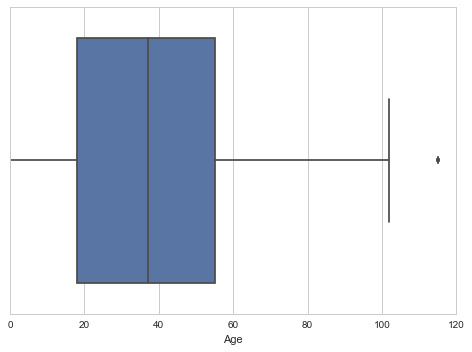

In [21]:
#plotting box plot on Age to check if there is any outliers 
sns.set_style('whitegrid')
ax = sns.boxplot(Med_data_df['Age'])


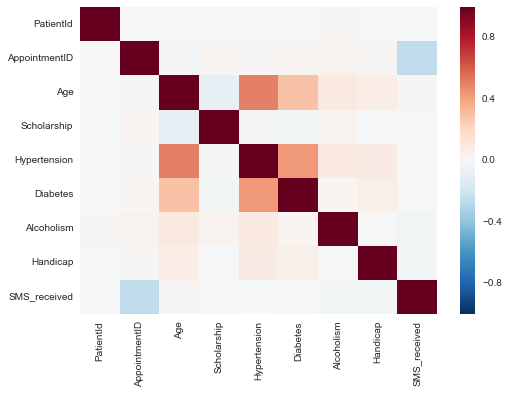

In [22]:
#correlation matrix
corr_df = Med_data_df.corr()
sns.heatmap(corr_df)

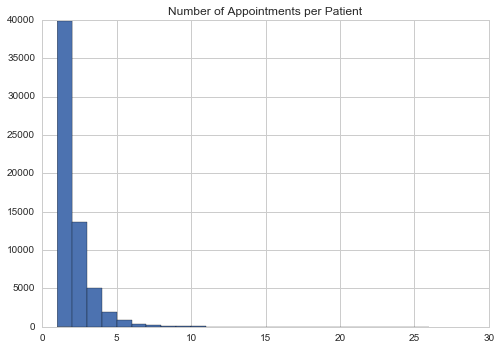

In [23]:
#Histogram number of appointments per patient

gb = Med_data_df.groupby('PatientId')['AppointmentDay'].nunique()
plt.figure()
plt.hist(gb, bins=gb.nunique())
plt.title("Number of Appointments per Patient")
plt.show()
#print "----------------"

#print Med_data_df.groupby('AppointmentDay')['PatientId'].nunique()

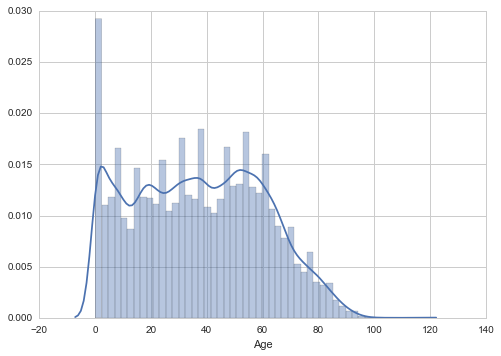

In [46]:
sns.distplot(Med_data_df.Age)

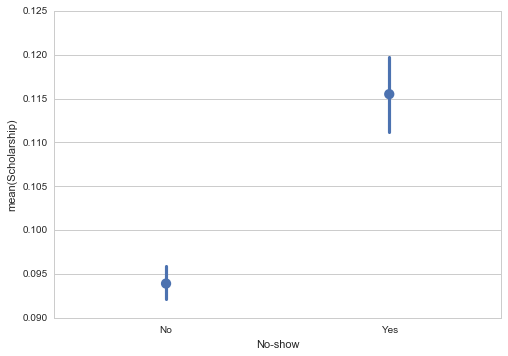

In [25]:
sns.pointplot(x='No-show', y='Scholarship', join= False, data=Med_data_df)

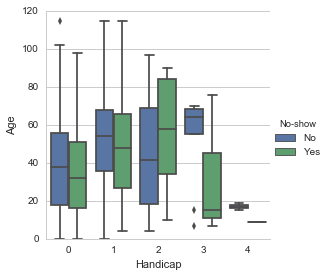

In [27]:
fig = plt.figure(figsize=(12, 10))
sns.factorplot(x='Handicap', y='Age', hue='No-show', data=Med_data_df, kind='box')

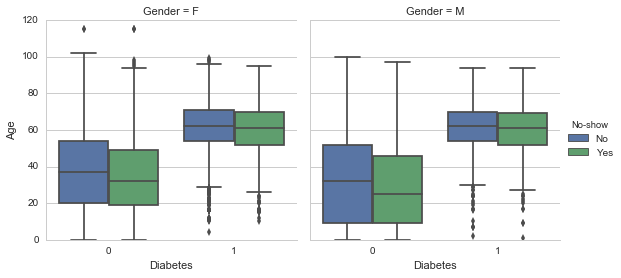

In [30]:
sns.factorplot(x = 'Diabetes', y = 'Age', hue='No-show', kind='box', col='Gender', data=Med_data_df)

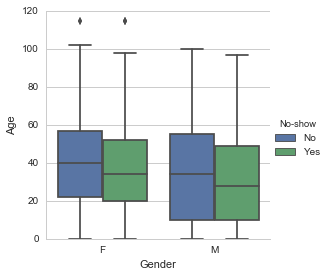

In [32]:
sns.factorplot(x='Gender', y='Age', hue='No-show',  data=Med_data_df, kind='box')

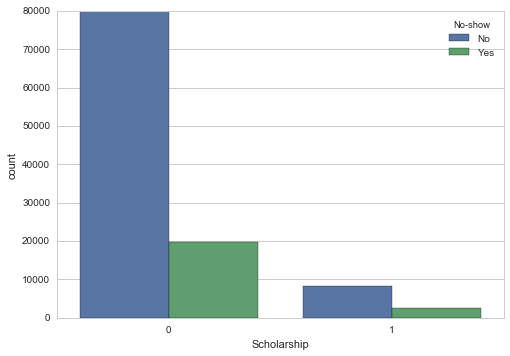

In [37]:
sns.countplot(x='Scholarship', hue='No-show', data=Med_data_df)

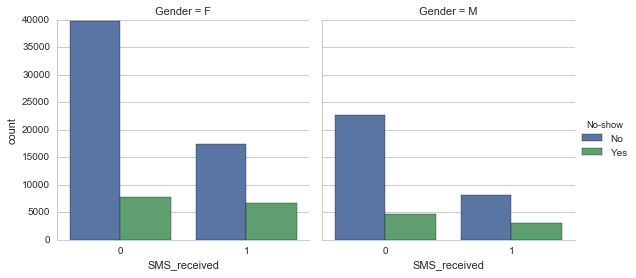

In [44]:
sns.factorplot(x='SMS_received', hue='No-show', col='Gender', data=Med_data_df, kind='count')

In [47]:
#view all the unige Gender
Med_data_df.Gender.unique()

array(['F', 'M'], dtype=object)

In [48]:
#creating duummy variable using pd.get_dimmies
gender_dummies = pd.get_dummies(Med_data_df['Gender'], prefix='Gender').iloc[:, 1:]

#concatenate dummy col with dataframe
Med_data_df = pd.concat([Med_data_df, gender_dummies], axis=1)

Med_data_df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Gender_M
0,2.987e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0
1,5.590e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1.0
2,4.263e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0


In [33]:
#checking target vaules
Med_data_df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
#create dummy variable for No-show variable
noshow_dummies = pd.get_dummies(Med_data_df['No-show'], prefix='No-Show').iloc[:,1:]

#concate dummy col with orig dataframe
Med_data_df = pd.concat([Med_data_df, noshow_dummies], axis=1)

Med_data_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Gender_M,No-Show_Yes
0,2.987e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0,0.0
1,5.590e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1.0,0.0
2,4.263e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0,0.0
3,8.680e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0,0.0
4,8.841e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0,0.0


In [50]:
#correlations between atrributes
Med_data_df.corr(method='pearson')

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_M,No-Show_Yes
PatientId,1.000,0.004,-0.004,-0.003,-0.006,0.002,1.101e-02,-0.008,-0.010,0.008,-1.456e-03
AppointmentID,0.004,1.000,-0.019,0.023,0.013,0.023,3.295e-02,0.014,-0.257,0.019,-1.626e-01
Age,-0.004,-0.019,1.000,-0.092,0.505,0.292,9.581e-02,0.078,0.013,-0.106,-6.033e-02
Scholarship,-0.003,0.023,-0.092,1.000,-0.020,-0.025,3.502e-02,-0.009,0.001,-0.114,2.913e-02
Hypertension,-0.006,0.013,0.505,-0.020,1.000,0.433,8.797e-02,0.080,-0.006,-0.056,-3.570e-02
Diabetes,0.002,0.023,0.292,-0.025,0.433,1.000,1.847e-02,0.058,-0.015,-0.033,-1.518e-02
Alcoholism,0.011,0.033,0.096,0.035,0.088,0.018,1.000e+00,0.005,-0.026,0.106,-1.968e-04
Handicap,-0.008,0.014,0.078,-0.009,0.080,0.058,4.647e-03,1.000,-0.024,0.023,-6.077e-03
SMS_received,-0.010,-0.257,0.013,0.001,-0.006,-0.015,-2.615e-02,-0.024,1.000,-0.046,1.264e-01
Gender_M,0.008,0.019,-0.106,-0.114,-0.056,-0.033,1.062e-01,0.023,-0.046,1.000,-4.122e-03


In [51]:
#rename column
# Gender- 1:Male, 0: Female
# NoShowUp- 1: No, 0: Yes
#Med_data_df.rename(columns={'Sex_M': 'Gender', 'NoShowUp_No': 'NoShowUp'}, inplace=True)
Med_data_df =  Med_data_df[['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','Neighbourhood', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Gender_M', 'No-Show_Yes']]
Med_data_df.head(3)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Neighbourhood,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_M,No-Show_Yes
0,2.987e+13,5642903,2016-04-29 18:38:08,2016-04-29,JARDIM DA PENHA,62,0,1,0,0,0,0,0.0,0.0
1,5.590e+14,5642503,2016-04-29 16:08:27,2016-04-29,JARDIM DA PENHA,56,0,0,0,0,0,0,1.0,0.0
2,4.263e+12,5642549,2016-04-29 16:19:04,2016-04-29,MATA DA PRAIA,62,0,0,0,0,0,0,0.0,0.0


In [52]:
data_df.skew()

PatientId        1.968
AppointmentID   -1.236
Age              0.122
Scholarship      2.699
Hipertension     1.522
Diabetes         3.316
Alcoholism       5.471
Handcap          8.274
SMS_received     0.767
dtype: float64

In [53]:
data_df.kurt()

PatientId         2.583
AppointmentID     3.744
Age              -0.952
Scholarship       5.286
Hipertension      0.316
Diabetes          8.993
Alcoholism       27.928
Handcap          82.556
SMS_received     -1.412
dtype: float64

In [54]:
#Let's compare
age_pop = Med_data_df['Age'].mean()
noshow_age = Med_data_df[Med_data_df['No-Show_Yes']==1]['Age'].mean()

print ('Mean of Age population is:' +str(age_pop))
print ("Mean of Age didn't No-show up:" +str(noshow_age))

Mean of Age population is:37.0892188263
Mean of Age didn't No-show up:34.3176665621


In [55]:
sample_age = np.array(Med_data_df['Age'])
Med_data_df.Age.count()

110526

In [56]:
print"50-percentile:", np.percentile(sample_age, 50)
print "Mean of sample ages", np.mean(sample_age)

50-percentile: 37.0
Mean of sample ages 37.0892188263


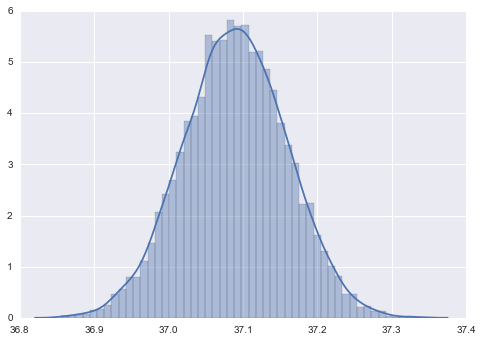

In [61]:
#Bootstrap on Age features
import seaborn as sns

def mean_sample_dist():
    sample_from_samples = np.random.choice(sample_age, len(Med_data_df.Age))
    return np.mean(sample_from_samples)

sample_from_sampling_dist = [mean_sample_dist() for _ in range(9999)]

sns.distplot(sample_from_sampling_dist)

In [55]:
#Confidence interval of CI=95%
print np.percentile(sample_from_sampling_dist, 2.5)
print np.percentile(sample_from_sampling_dist, 97.5)

36.9527165554
37.2299567523


In [60]:
import scipy.stats as stats

stats.ttest_1samp(Med_data_df[Med_data_df['No-Show_Yes']==1]['Age'], age_pop)

Ttest_1sampResult(statistic=-18.849968798209073, pvalue=1.2010360201795914e-78)

This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with `stats.t.ppf()`:

Based on the statistical analysis of a one sample _t-test_ and _p-value_, there seems to be some significant difference between the means of ages between patients who didn't show-up and the entire pateint population. The super-low of _p-value_ `1.2010360201795914e-78` at 5% of CI is a good indicator for _rejecting the null hypothesis_.

In [63]:
Med_data_df.head(2)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Neighbourhood,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_M,No-Show_Yes
0,2.987e+13,5642903,2016-04-29 18:38:08,2016-04-29,JARDIM DA PENHA,62,0,1,0,0,0,0,0.0,0.0
1,5.590e+14,5642503,2016-04-29 16:08:27,2016-04-29,JARDIM DA PENHA,56,0,0,0,0,0,0,1.0,0.0


In [57]:
#Youth = Med_data_df[(Med_data_df.Age < 18)]
#Millennial = Med_data_df[(Med_data_df.Age>=18) & (Med_data_df<35)]
#Gen_x =Med_data_df[(Med_data_df.Age>=35) & (Med_data_df.Age<50)]

Med_data_df['Age_class'] = np.where(Med_data_df['Age']<18, 'Youth', 'Adult')
Med_data_df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Neighbourhood,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_M,No-Show_Yes,Age_class
0,2.987e+13,5642903,2016-04-29 18:38:08,2016-04-29,JARDIM DA PENHA,62,0,1,0,0,0,0,0.0,0.0,Adult
1,5.590e+14,5642503,2016-04-29 16:08:27,2016-04-29,JARDIM DA PENHA,56,0,0,0,0,0,0,1.0,0.0,Adult
2,4.263e+12,5642549,2016-04-29 16:19:04,2016-04-29,MATA DA PRAIA,62,0,0,0,0,0,0,0.0,0.0,Adult
3,8.680e+11,5642828,2016-04-29 17:29:31,2016-04-29,PONTAL DE CAMBURI,8,0,0,0,0,0,0,0.0,0.0,Youth
4,8.841e+12,5642494,2016-04-29 16:07:23,2016-04-29,JARDIM DA PENHA,56,0,1,1,0,0,0,0.0,0.0,Adult


In [58]:
#rename column
# Gender- 1:Male, 0: Female
# NoShowUp- 1: No, 0: Yes
#Med_data_df.rename(columns={'Gender_M': 'Gender', 'No-Show_Yes': 'NoShowUp'}, inplace=True)
Med_data_df =  Med_data_df[['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','Neighbourhood', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Age_class', 'Gender_M', 'No-Show_Yes']]
Med_data_df.head(3)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Neighbourhood,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Age_class,Gender_M,No-Show_Yes
0,2.987e+13,5642903,2016-04-29 18:38:08,2016-04-29,JARDIM DA PENHA,62,0,1,0,0,0,0,Adult,0.0,0.0
1,5.590e+14,5642503,2016-04-29 16:08:27,2016-04-29,JARDIM DA PENHA,56,0,0,0,0,0,0,Adult,1.0,0.0
2,4.263e+12,5642549,2016-04-29 16:19:04,2016-04-29,MATA DA PRAIA,62,0,0,0,0,0,0,Adult,0.0,0.0


In [59]:
age_class = Med_data_df.groupby('Age_class').size()
age_class

Age_class
Adult    83147
Youth    27379
dtype: int64

## Data Modelling 

Many machine learning algorithm make assumpution about your data. Its very good to carefully look the structure of the data. There are different rescaling method, in this case I will use Binarize data for preprocessing Age feature.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
#Let split our features and target variables medical reporting data
target = Med_data_df[['No-Show_Yes']]
features = Med_data_df.drop(['No-Show_Yes', 'Age_class', 'Neighbourhood'], axis=1)

features['Gender_M'] = features['Gender_M'].astype(int)
features['PatientId'] = features['PatientId'].astype(int)
features['ScheduledDay'] = features['ScheduledDay'].astype(int)
features['AppointmentDay'] = features['AppointmentDay'].astype(int)
features.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_M
0,29872499824296,5642903,1461955088000000000,1461888000000000000,62,0,1,0,0,0,0,0
1,558997776694438,5642503,1461946107000000000,1461888000000000000,56,0,0,0,0,0,0,1
2,4262962299951,5642549,1461946744000000000,1461888000000000000,62,0,0,0,0,0,0,0
3,867951213174,5642828,1461950971000000000,1461888000000000000,8,0,0,0,0,0,0,0
4,8841186448183,5642494,1461946043000000000,1461888000000000000,56,0,1,1,0,0,0,0


In [68]:
## split-out validation dataset
X_train, X_test, Y_train, Y_test =  train_test_split(features, target, test_size=0.3, random_state=11)

#test option and evaluation metrics
num_fold=10
scoring = 'accuracy'


binarizer_X = Binarizer().fit(X_train)


#spot checking algorithms
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

#Evaluate algorithm using test harness

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=11)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    

LR: 0.792679 (0.003797)
KNN: 0.765278 (0.003239)
CART: 0.718165 (0.004730)
NB: 0.789564 (0.004220)
RF: 0.785454 (0.004142)


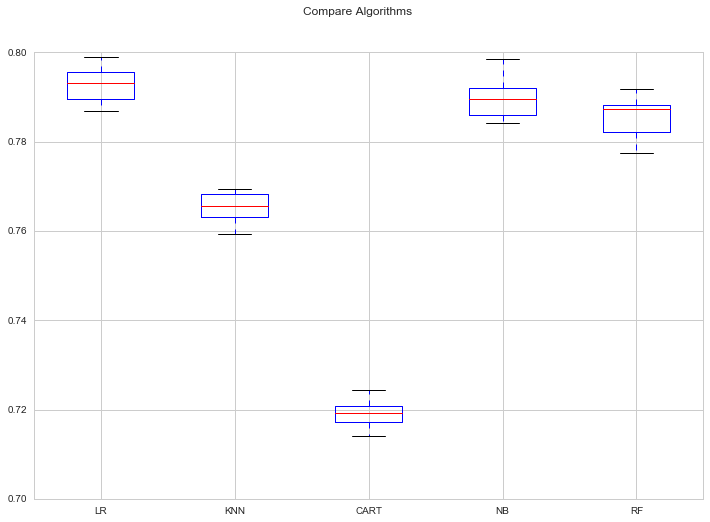

In [70]:
#compare algorithms
fig = plt.figure(figsize=(12,8))
fig.suptitle('Compare Algorithms')
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [75]:
#Algorithm Tuning of Logistic regression (LR)

scaler = Binarizer().fit(X_train)
rescaledX = scaler.transform(X_train)
scoring = 'accuracy'

param_grid = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_grid = GridSearchCV(LogisticRegression(penalty='l1'), param_grid=param_grid, scoring='accuracy', cv=kfold)
clf_grid_result = clf_grid.fit(rescaledX, Y_train)

print "Best_Score: {}, Best_Parameter {}".format(clf_grid.best_score_, clf_grid.best_params_)

Best_Score: 0.797926791438, Best_Parameter {'C': 0.0001}
